_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [2]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">Exploring Business Establishments in the City of Melbourne by ANZSIC4 Classification and CLUE Small Area</div>

<div class="usecase-authors"><b>Authored by: </b> Naga Nikhil Woopalanchi</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

<div class="usecase-section-header">Scenario</div>

write a description of the problem you are trying to solve for this use case{Using User Story format, .}

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- {list the skills demonstrated in your use case}

<div class="usecase-section-header">{Heading for introduction or background relating to problem}</div>

{Write your introduction here. Keep it concise. We're not after "War and Peace" but enough background information to inform the reader on the rationale for solving this problem or background non-technical information that helps explain the approach. You may also wish to give information on the datasets, particularly how to source those not being imported from the client's open data portal.}



***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```

# Importing Libraries

In [3]:
import warnings
warnings.filterwarnings("ignore")

import requests
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import geopandas as gpd 
from shapely.geometry import Point

In [4]:
# business-establishments-and-jobs-data-by-business-size-and-industry

base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='business-establishments-and-jobs-data-by-business-size-and-industry'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC' }

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    bizsize_industryjobs=pd.read_csv(StringIO(url_content),delimiter=';')   #renaming dataset
    print(bizsize_industryjobs.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

   census_year               clue_small_area  \
0         2015  West Melbourne (Residential)   
1         2015  West Melbourne (Residential)   
2         2015  West Melbourne (Residential)   
3         2015  West Melbourne (Residential)   
4         2015  West Melbourne (Residential)   
5         2015  West Melbourne (Residential)   
6         2014                       Carlton   
7         2014                       Carlton   
8         2014                       Carlton   
9         2014                       Carlton   

                                   anzsic_indusrty  \
0                Health Care and Social Assistance   
1                                    Manufacturing   
2                                    Manufacturing   
3  Professional, Scientific and Technical Services   
4          Rental, Hiring and Real Estate Services   
5                                  Wholesale Trade   
6              Administrative and Support Services   
7                                     C

In [5]:
# business-establishments-with-address-and-industry-classification

base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='business-establishments-with-address-and-industry-classification'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    bizaddressindustry=pd.read_csv(StringIO(url_content),delimiter=';')    #Renaming dataset
    print(bizaddressindustry.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

   census_year  block_id  property_id  base_property_id  clue_small_area  \
0         2003       105       100172            100172  Melbourne (CBD)   
1         2003       105       103301            103301  Melbourne (CBD)   
2         2003       105       103302            103302  Melbourne (CBD)   
3         2003       105       103302            103302  Melbourne (CBD)   
4         2003       105       103302            103302  Melbourne (CBD)   
5         2003       105       103302            103302  Melbourne (CBD)   
6         2003       105       103302            103302  Melbourne (CBD)   
7         2003       105       103302            103302  Melbourne (CBD)   
8         2003       105       103302            103302  Melbourne (CBD)   
9         2003       105       109319            109319  Melbourne (CBD)   

                                        trading_name  \
0                           Wilson Parking Australia   
1                Melbourne International Backpacker

In [6]:
# Street-address

base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='street-addresses'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    street_add=pd.read_csv(StringIO(url_content),delimiter=';')  #renaming dataset
    print(street_add.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

                         geo_point_2d  \
0  -37.802381557572, 144.941473440919   
1  -37.816860132435, 144.969991449806   
2  -37.798830275265, 144.942872100233   
3  -37.810546771396, 144.970906397029   
4  -37.789293657657, 144.939794028368   
5  -37.800782747366, 144.951363910142   
6  -37.826775193662, 144.959358160779   
7  -37.810925617843, 144.965443591832   
8   -37.81275302482, 144.964263891172   
9   -37.821209833971, 144.95403377339   

                                           geo_shape  suburb_id   latitude  \
0  {"coordinates": [144.941473440919, -37.8023815...      592.0 -37.802382   
1  {"coordinates": [144.969991449806, -37.8168601...      591.0 -37.816860   
2  {"coordinates": [144.942872100233, -37.7988302...      592.0 -37.798830   
3  {"coordinates": [144.970906397029, -37.8105467...      591.0 -37.810547   
4  {"coordinates": [144.939794028368, -37.7892936...      592.0 -37.789294   
5  {"coordinates": [144.951363910142, -37.8007827...      592.0 -37.800783   
6 

# Preprocessing

## Street_add

In [7]:
street_add.head()

,geo_point_2d,geo_shape,suburb_id,latitude,street_no,str_name,address_pnt,easting,northing,gisid,longitude,suburb,street_id,add_comp
0,"-37.802381557572, 144.941473440919","{""coordinates"": [144.941473440919, -37.8023815...",592.0,-37.802382,133,Laurens Street,133 Laurens Street North Melbourne,318773.161972,5.814115e+06,48531,144.941473,North Melbourne,781,NaN
1,"-37.816860132435, 144.969991449806","{""coordinates"": [144.969991449806, -37.8168601...",591.0,-37.816860,129,Flinders Street,129 Flinders Street Melbourne,321318.983104,5.812563e+06,37711,144.969991,Melbourne,636,NaN
2,"-37.798830275265, 144.942872100233","{""coordinates"": [144.942872100233, -37.7988302...",592.0,-37.798830,44,Macaulay Road,44 Macaulay Road North Melbourne,318887.633593,5.814512e+06,30476,144.942872,North Melbourne,847,NaN
3,"-37.810546771396, 144.970906397029","{""coordinates"": [144.970906397029, -37.8105467...",591.0,-37.810547,13,Punch Lane,13 Punch Lane Melbourne,321384.307636,5.813265e+06,35165,144.970906,Melbourne,1003,NaN
4,"-37.789293657657, 144.939794028368","{""coordinates"": [144.939794028368, -37.7892936...",592.0,-37.789294,61,Racecourse Road,61 Racecourse Road North Melbourne,318593.277492,5.815564e+06,22247,144.939794,North Melbourne,119624,NaN


In [8]:
street_add.shape

(63721, 14)

In [10]:
street_add.columns

Index(['geo_point_2d', 'geo_shape', 'suburb_id', 'latitude', 'street_no',
       'str_name', 'address_pnt', 'easting', 'northing', 'gisid', 'longitude',
       'suburb', 'street_id', 'add_comp'],
      dtype='object')

In [11]:
street_add = street_add.drop(['geo_point_2d','geo_shape','easting','northing','gisid'],axis=1)

In [13]:
street_add.head()

,suburb_id,latitude,street_no,str_name,address_pnt,longitude,suburb,street_id,add_comp
0,592.0,-37.802382,133,Laurens Street,133 Laurens Street North Melbourne,144.941473,North Melbourne,781,NaN
1,591.0,-37.816860,129,Flinders Street,129 Flinders Street Melbourne,144.969991,Melbourne,636,NaN
2,592.0,-37.798830,44,Macaulay Road,44 Macaulay Road North Melbourne,144.942872,North Melbourne,847,NaN
3,591.0,-37.810547,13,Punch Lane,13 Punch Lane Melbourne,144.970906,Melbourne,1003,NaN
4,592.0,-37.789294,61,Racecourse Road,61 Racecourse Road North Melbourne,144.939794,North Melbourne,119624,NaN


### Handling missing values in 'street_add'

In [14]:
street_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63721 entries, 0 to 63720
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   suburb_id    63715 non-null  float64
 1   latitude     63721 non-null  float64
 2   street_no    63069 non-null  object 
 3   str_name     63720 non-null  object 
 4   address_pnt  63721 non-null  object 
 5   longitude    63721 non-null  float64
 6   suburb       62991 non-null  object 
 7   street_id    63721 non-null  int64  
 8   add_comp     1352 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.4+ MB


In [15]:
street_add.isna().sum()

suburb_id          6
latitude           0
street_no        652
str_name           1
address_pnt        0
longitude          0
suburb           730
street_id          0
add_comp       62369
dtype: int64

#### Handing missing values for 'add_comp' column

With more than half of the values missing for this column dropping this column 


In [16]:
street_add = street_add.drop('add_comp',axis = 1)

observing the row with missing values or the suburb_id is zero 

In [17]:
suburb_id_nan = street_add[street_add['suburb_id'].isna()]

suburb_id_nan

,suburb_id,latitude,street_no,str_name,address_pnt,longitude,suburb,street_id
15724,NaN,-37.825995,50,Normanby Road,50 Normanby Road,144.955261,NaN,1368
26136,NaN,-37.827486,126,Normanby Road,126 Normanby Road,144.952721,NaN,1368
29528,NaN,-37.827525,130,Normanby Road,130 Normanby Road,144.952561,NaN,1368
34191,NaN,-37.827506,128,Normanby Road,128 Normanby Road,144.952641,NaN,1368
55077,NaN,-37.827467,124,Normanby Road,124 Normanby Road,144.952801,NaN,1368
57013,NaN,-37.826040,52,Normanby Road,52 Normanby Road,144.955198,NaN,1368


In [18]:
suburb_id_zero= street_add[street_add['suburb'].isna()]

suburb_id_zero

,suburb_id,latitude,street_no,str_name,address_pnt,longitude,suburb,street_id
20,0.0,-37.788135,772,Lygon Street,772 Lygon Street,144.969279,NaN,840
61,0.0,-37.827770,165,Normanby Road,165 Normanby Road,144.951017,NaN,1368
85,0.0,-37.786158,42,Leonard Crescent,42 Leonard Crescent,144.906459,NaN,1313
118,0.0,-37.804792,68,Nicholson Street,68 Nicholson Street,144.973896,NaN,931
559,0.0,-37.775535,951,Park Street,951 Park Street,144.940570,NaN,962
...,...,...,...,...,...,...,...,...
63124,0.0,-37.781990,34,Langs Road,34 Langs Road,144.908970,NaN,1312
63127,0.0,-37.780382,62,Bowen Crescent,62 Bowen Crescent,144.962916,NaN,457
63235,0.0,-37.784645,10,Garton Street,10 Garton Street,144.963762,NaN,648
63390,0.0,-37.785339,465,Lygon Street,465 Lygon Street,144.969403,NaN,840


replacing missing suburb_id values with 0 

In [19]:
street_add['suburb_id'] = street_add['suburb_id'].fillna(0)

In [20]:
street_add['suburb'] = street_add['suburb'].fillna('unknown suburb')

In [21]:
street_add.isna().sum()

suburb_id        0
latitude         0
street_no      652
str_name         1
address_pnt      0
longitude        0
suburb           0
street_id        0
dtype: int64

Replacing the missing street_no with 0 

In [22]:
street_add['street_no']= street_add['street_no'].fillna(0)

In [23]:
street_name = street_add[street_add['str_name'].isna()]

street_name

,suburb_id,latitude,street_no,str_name,address_pnt,longitude,suburb,street_id
58476,592.0,-37.796995,5,NaN,5 North Melbourne,144.95,North Melbourne,2931


In [24]:
street_add['str_name'] = street_add['str_name'].fillna('unknow street_name')

In [25]:
street_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63721 entries, 0 to 63720
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   suburb_id    63721 non-null  float64
 1   latitude     63721 non-null  float64
 2   street_no    63721 non-null  object 
 3   str_name     63721 non-null  object 
 4   address_pnt  63721 non-null  object 
 5   longitude    63721 non-null  float64
 6   suburb       63721 non-null  object 
 7   street_id    63721 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 3.9+ MB


correcting the datatype from the dataset, subrurb_id should be int datatype not object. 

In [26]:
street_add['suburb_id'] = street_add['suburb_id'].apply(np.int64)

In [27]:
street_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63721 entries, 0 to 63720
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   suburb_id    63721 non-null  int64  
 1   latitude     63721 non-null  float64
 2   street_no    63721 non-null  object 
 3   str_name     63721 non-null  object 
 4   address_pnt  63721 non-null  object 
 5   longitude    63721 non-null  float64
 6   suburb       63721 non-null  object 
 7   street_id    63721 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.9+ MB


In [28]:
suburb_id_keys = street_add[['suburb_id','suburb']]

suburb_id_keys = suburb_id_keys.drop_duplicates()

print(suburb_id_keys)

     suburb_id           suburb
0          592  North Melbourne
1          591        Melbourne
6          596        Southbank
9          599        Docklands
10         597   West Melbourne
11         593        Parkville
12         585          Carlton
16         587   East Melbourne
19         590       Kensington
20           0   unknown suburb
23         594   Port Melbourne
52         588       Flemington
81         595      South Yarra
121        586    Carlton North
464        840      South Wharf


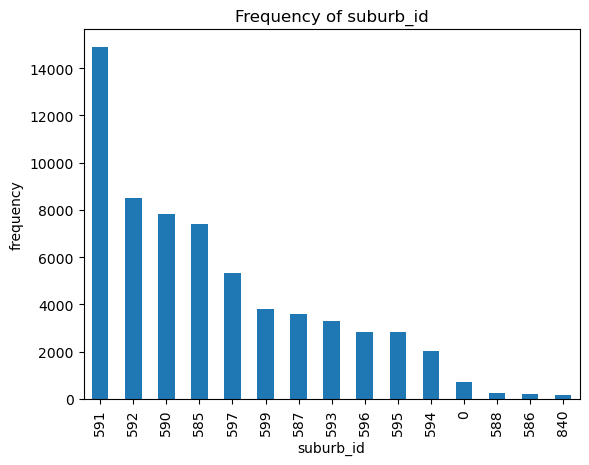

In [29]:
suburb_counts = street_add['suburb_id'].value_counts()

suburb_counts.plot(kind = 'bar')
plt.xlabel('suburb_id')
plt.ylabel('frequency')
plt.title('Frequency of suburb_id')
plt.show()

## bizsize_industryjobs

In [30]:
bizsize_industryjobs.head()

,census_year,clue_small_area,anzsic_indusrty,clue_industry,business_size,total_establishments,total_jobs
0,2015,West Melbourne (Residential),Health Care and Social Assistance,Health Care and Social Assistance,Large business,1,NaN
1,2015,West Melbourne (Residential),Manufacturing,Manufacturing,Medium business,5,171.0
2,2015,West Melbourne (Residential),Manufacturing,Manufacturing,Non employing,1,NaN
3,2015,West Melbourne (Residential),"Professional, Scientific and Technical Services",Business Services,Non employing,3,0.0
4,2015,West Melbourne (Residential),"Rental, Hiring and Real Estate Services",Real Estate Services,Small business,5,42.0


In [31]:
bizsize_industryjobs = bizsize_industryjobs.sort_values(by = 'census_year',ascending = True)

In [32]:
bizsize_industryjobs.columns

Index(['census_year', 'clue_small_area', 'anzsic_indusrty', 'clue_industry',
       'business_size', 'total_establishments', 'total_jobs'],
      dtype='object')

In [33]:
bizsize_industryjobs['census_year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [34]:
bizsize_cluesmallarea = bizsize_industryjobs['clue_small_area'].unique()

bizsize_cluesmallarea

array(['Melbourne (CBD)', 'City of Melbourne (total)',
       'West Melbourne (Residential)', 'Docklands', 'Carlton',
       'Port Melbourne', 'South Yarra', 'North Melbourne', 'Parkville',
       'Southbank', 'West Melbourne (Industrial)', 'East Melbourne',
       'Kensington', 'Melbourne (Remainder)'], dtype=object)

In [35]:
bizsize_anzsic =bizsize_industryjobs['anzsic_indusrty'].unique()
bizsize_anzsic

array(['Public Administration and Safety', 'Construction',
       'Education and Training',
       'Electricity, Gas, Water and Waste Services',
       'Financial and Insurance Services',
       'Health Care and Social Assistance', 'Manufacturing', 'Mining',
       'Other Services',
       'Professional, Scientific and Technical Services',
       'Rental, Hiring and Real Estate Services',
       'Arts and Recreation Services',
       'Administrative and Support Services', 'Retail Trade',
       'Transport, Postal and Warehousing', 'Wholesale Trade',
       'Accommodation and Food Services',
       'Agriculture, Forestry and Fishing',
       'Information Media and Telecommunications', 'All ANZSIC'],
      dtype=object)

In [36]:
bizsize_clueindustry = bizsize_industryjobs['clue_industry'].unique()
bizsize_clueindustry

array(['Public Administration and Safety', 'Construction',
       'Education and Training',
       'Electricity, Gas, Water and Waste Services',
       'Finance and Insurance', 'Health Care and Social Assistance',
       'Manufacturing', 'Agriculture and Mining', 'Other Services',
       'Business Services', 'Real Estate Services',
       'Arts and Recreation Services', 'Admin and Support Services',
       'Rental and Hiring Services', 'Retail Trade',
       'Transport, Postal and Storage', 'Wholesale Trade',
       'Accommodation', 'Food and Beverage Services',
       'Information Media and Telecommunications', 'All CLUE Industry'],
      dtype=object)

In [37]:
bizsize_industryjobs['business_size'].unique()

array(['Non employing', 'Medium business', 'Small business',
       'Large business'], dtype=object)

In [38]:
bizsize_industryjobs['total_establishments'].unique()

array([    1,    32,    78,    12,    15,     5,    48,    17,     7,
           6,   933,  1581,    42,     3,    90,   106,   114,   144,
         148,   111,     2,     9,     4,    43,    18,    49,   109,
        1214,   158,    10,    67,    53,    22,    21,  9586,    11,
         149,    36,    33,    30,   122,   129,     8,    13,    19,
          96,    35,    38,   176,    39,    88,    60,    29,    87,
          23,    27,    20,    56,    37,    69,   147,   428,    31,
          14,    25,    44,    57,   501,   228,  1072,   275,    65,
         105,    24,    85,    70,    72,    16,   143,   312,    98,
         802,    50,   115,   593,  1685,    62,    40,   341,    58,
         554,   190,    93,    59,   108,    54,   404,   137,    75,
        1237,   154,    51,    89,   181,   134,   553,   688,   233,
         462,    82,   513,   229,  1695,    55,   185,   551,   163,
        1245,   121,    80,   156,   135,   162,    26,   127,    28,
        1707,   187,

In [39]:
bizsize_industryjobs['total_jobs'].unique()

array([   nan,  1783.,  4726., ...,  3183.,  1044., 11618.])

In [40]:
bizsize_industryjobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 7345 to 9761
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   census_year           14692 non-null  int64  
 1   clue_small_area       14692 non-null  object 
 2   anzsic_indusrty       14692 non-null  object 
 3   clue_industry         14692 non-null  object 
 4   business_size         14692 non-null  object 
 5   total_establishments  14692 non-null  int64  
 6   total_jobs            10365 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 918.2+ KB


In [41]:
bizsize_industryjobs.isna().sum()

census_year                0
clue_small_area            0
anzsic_indusrty            0
clue_industry              0
business_size              0
total_establishments       0
total_jobs              4327
dtype: int64

In [42]:
business_size_descriptive = bizsize_industryjobs.groupby('business_size')['total_jobs'].describe()

business_size_descriptive 

,count,mean,std,min,25%,50%,75%,max
business_size,,,,,,,,
Large business,1076.0,12633.487918,32292.079142,687.0,2084.5,3882.0,11539.25,273200.0
Medium business,3095.0,2418.815509,10420.953933,66.0,222.5,409.0,1267.00,153302.0
Non employing,1720.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Small business,4474.0,984.121144,5117.223702,3.0,48.0,108.0,393.50,80008.0


In [43]:
bizsize_industryjobs['total_jobs'] = bizsize_industryjobs.groupby('business_size')['total_jobs'].transform(lambda x: x.fillna(x.min()))

In [44]:
bizsize_industryjobs['total_jobs'] = bizsize_industryjobs['total_jobs'].apply(np.int64)

In [45]:
bizsize_industryjobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 7345 to 9761
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   census_year           14692 non-null  int64 
 1   clue_small_area       14692 non-null  object
 2   anzsic_indusrty       14692 non-null  object
 3   clue_industry         14692 non-null  object
 4   business_size         14692 non-null  object
 5   total_establishments  14692 non-null  int64 
 6   total_jobs            14692 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 918.2+ KB


## bizaddressindustry

In [46]:
bizsize_industryjobs.shape

(14692, 7)

In [47]:
bizaddressindustry.head()

,census_year,block_id,property_id,base_property_id,clue_small_area,trading_name,business_address,industry_anzsic4_code,industry_anzsic4_description,longitude,latitude
0,2003,105,100172,100172,Melbourne (CBD),Wilson Parking Australia,24-46 A'Beckett Street MELBOURNE 3000,9533,Parking Services,144.962053,-37.808573
1,2003,105,103301,103301,Melbourne (CBD),Melbourne International Backpackers,442-450 Elizabeth Street MELBOURNE 3000,4400,Accommodation,144.960868,-37.808309
2,2003,105,103302,103302,Melbourne (CBD),Vacant,422-440 Elizabeth Street MELBOURNE 3000,0,Vacant Space,144.961017,-37.808630
3,2003,105,103302,103302,Melbourne (CBD),The Garden Cafe,"Shop 3, Ground , 422-440 Elizabeth Street MELB...",4511,Cafes and Restaurants,144.961017,-37.808630
4,2003,105,103302,103302,Melbourne (CBD),Telephony Australia,"Shop 5, Ground , 422-440 Elizabeth Street MELB...",5809,Other Telecommunications Services,144.961017,-37.808630


In [48]:
bizaddressindustry=bizaddressindustry.sort_values(by='census_year',ascending = True)

In [49]:
bizaddressindustry.columns

Index(['census_year', 'block_id', 'property_id', 'base_property_id',
       'clue_small_area', 'trading_name', 'business_address',
       'industry_anzsic4_code', 'industry_anzsic4_description', 'longitude',
       'latitude'],
      dtype='object')

In [50]:
bizaddress_censusyear = bizaddressindustry['census_year'].unique()

bizaddress_censusyear

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [51]:
bizaddressindustry['block_id'].unique() 

array([ 748,   78,   77,   74,   76,   82,   81,   73,   72,   85,   93,
         92,   91,   87,   84,   83,   64,   63,   62,   57,   58,   61,
         67,   66,   68,   71,   65,   94,  242,  241,  240,  239,  237,
        226,  227,  228,  229,  230,  232,  234,  236,  246,  245,  243,
        218,  217,  223,  224,  225,  222,  220,  219,  260,  259,  258,
        257,  255,  256,  267,  266,  265,  264,  261,  262,  263,  251,
        248,  247,  252,  254,  105,  104,  103,  101,  113,  107,  111,
         98,   97,   95,   96,  210,  207,  206,  205,  212,  213,  216,
        215,  204,  214,  203,  201,  114,  125,  131,  116,  115,   35,
         38,   37,   36,   32,   33,   31,   28,   34,   53,   52,   51,
         47,   46,   48,   56,   54,   55,   43,   42,   44,   41,   45,
        803,  802,  801,  795,  808,  807,  806,  804,  794,  793,  784,
        783,  782,  781,  779,  791,  790,  792,  785,  786,  787,  789,
        788,  778,  920,  919,  916,  915,  870,  9

In [52]:
bizaddressindustry['property_id'].unique()

array([108658, 103618, 105752, ..., 714182, 714412, 511130], dtype=int64)

In [53]:
bizaddressindustry['base_property_id'].unique()

array([108658, 103618, 110709, ..., 102196, 714412, 511130], dtype=int64)

In [54]:
bizaddress_cluesmallarea = bizaddressindustry['clue_small_area'].unique()

bizaddress_cluesmallarea

array(['Southbank', 'Melbourne (CBD)', 'West Melbourne (Residential)',
       'Carlton', 'Docklands', 'Port Melbourne', 'Parkville',
       'Melbourne (Remainder)', 'West Melbourne (Industrial)',
       'South Yarra', 'East Melbourne', 'North Melbourne', 'Kensington'],
      dtype=object)

In [55]:
bizaddressindustry['industry_anzsic4_code'].unique()

array([   0, 4511, 9531, 4512, 5801, 7220, 1611, 6999, 4129, 8101, 5101,
       9551, 6720, 4520, 3211, 7000, 6931, 4810, 4271, 9540, 4279, 8102,
       7299, 9511, 9559, 6411, 6932, 6230, 7510, 6924, 4400, 4213, 6419,
       5419, 6921, 1191, 7520, 6330, 4211, 3912, 4242, 4241, 7540, 9533,
       9001, 1510, 7714, 5299, 8219, 6961, 5809, 9002, 8599, 8512, 4252,
       8532, 4255, 4273, 4244, 4258, 4251, 4243, 4257, 4710, 4110, 9552,
       9539, 8922, 6923, 9422, 8531, 2620, 2491, 3231, 6922, 4221, 2640,
       4530, 2599, 9411, 6221, 7711, 4274, 6962, 4253, 4259, 4214, 3494,
       1351, 2700, 1333, 9491, 7211, 3732, 1523, 8511, 8220, 6940, 7552,
       5910, 5922, 5309, 9003, 8790, 5413, 4111, 6950, 3339, 3019, 5411,
       7291, 4123, 4260, 5513, 6991, 5420, 6223, 5610, 8212, 3739, 9114,
       3711, 3299, 6420, 4121, 8520, 4623, 3332, 8539, 2591, 8710, 1912,
       3605, 9419, 7311, 8021, 7600, 8537, 4222, 6632, 6611, 3419, 3921,
       4122, 4272, 4000, 2010, 6925, 9111, 1620, 95

In [56]:
bizaddressindustry_anzsic4_desc = bizaddressindustry['industry_anzsic4_description'].unique()

bizaddressindustry_anzsic4_desc

array(['Vacant Space', 'Cafes and Restaurants',
       'Laundry and Dry-Cleaning Services', 'Takeaway Food Services',
       'Wired Telecommunications Network Operation',
       'Travel Agency and Tour Arrangement Services', 'Printing',
       'Other Professional, Scientific and Technical Services n.e.c.',
       'Other Specialised Food Retailing',
       'Technical and Vocational Education and Training',
       'Postal Services',
       'Business and Professional Association Services',
       'Real Estate Services', 'Pubs, Taverns and Bars',
       'Land Development and Subdivision',
       'Computer System Design and Related Services', 'Legal Services',
       'Water Freight Transport',
       'Pharmaceutical, Cosmetic and Toiletry Goods Retailing',
       'Religious Services', 'Other Store-Based Retailing n.e.c.',
       'Higher Education', 'Other Administrative Services n.e.c.',
       'Hairdressing and Beauty Services',
       'Other Interest Group Services n.e.c.',
       'Financ

In [57]:
bizaddressindustry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374210 entries, 198360 to 318285
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   census_year                   374210 non-null  int64  
 1   block_id                      374210 non-null  int64  
 2   property_id                   374210 non-null  int64  
 3   base_property_id              374210 non-null  int64  
 4   clue_small_area               374210 non-null  object 
 5   trading_name                  374083 non-null  object 
 6   business_address              374209 non-null  object 
 7   industry_anzsic4_code         374210 non-null  int64  
 8   industry_anzsic4_description  374210 non-null  object 
 9   longitude                     369425 non-null  float64
 10  latitude                      369425 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 34.3+ MB


In [58]:
bizaddressindustry.isna().sum()

census_year                        0
block_id                           0
property_id                        0
base_property_id                   0
clue_small_area                    0
trading_name                     127
business_address                   1
industry_anzsic4_code              0
industry_anzsic4_description       0
longitude                       4785
latitude                        4785
dtype: int64

In [59]:
bizaddressindustry['trading_name'] = bizaddressindustry['trading_name'].fillna('unknown name')

bizaddressindustry['business_address'] = bizaddressindustry['business_address'].fillna('unknown address')